In [1]:
# import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\pawan\\Downloads\\Python'

In [4]:
#Load dataset for train
train = pd.read_csv("train.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
train.shape

(1460, 81)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Analysis on the target variable

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


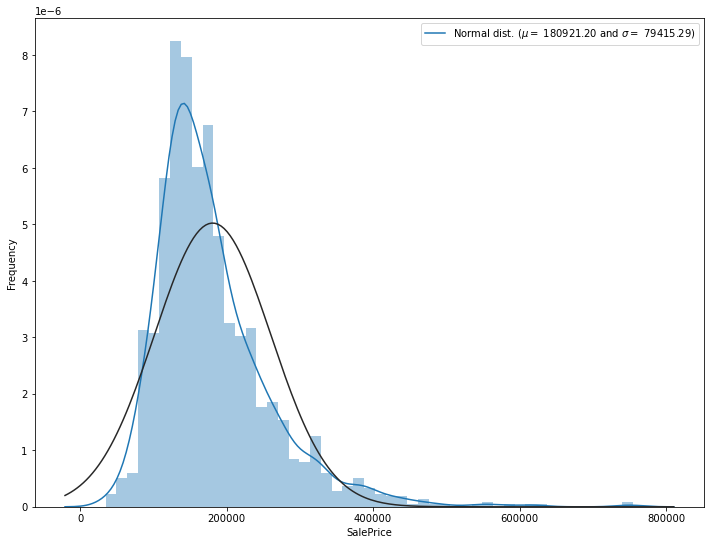

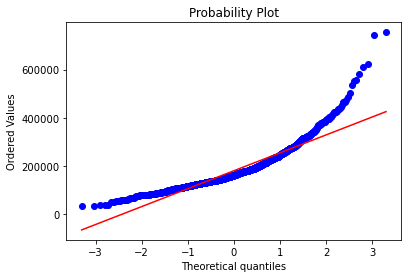

In [9]:
plt.subplots(figsize = (12,9))
sns.distplot(train['SalePrice'], fit =stats.norm)

#GET THE FITTED PARAMETERS USED BY THE FUNCTION
(mu,sigma) =stats.norm.fit(train['SalePrice'])

#PLOT WITH THE DISTRIBUTION
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma = $ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')

# PROBABILITY PLOT
fig = plt.figure()
stats.probplot(train['SalePrice'], plot= plt)
plt.show()

The target variable is right skewed. now we need to transform this variable and make it normal distribution.

#### Use of a log function is the most common way to make a more normal distribution . We will do that in the following section.

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


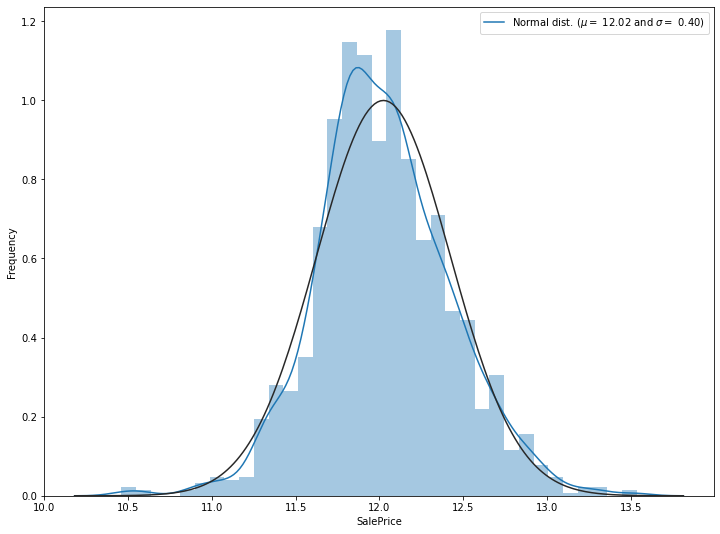

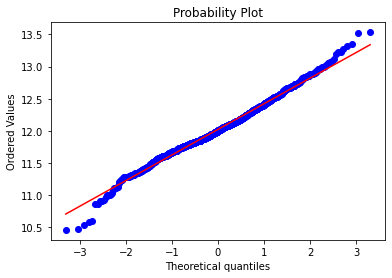

In [10]:
#we use log which is a part of numpy library
train['SalePrice']= np.log1p(train['SalePrice'])

#check again for normal distribution
plt.subplots(figsize = (12,9))
sns.distplot(train['SalePrice'], fit =stats.norm)

#GET THE FITTED PARAMETERS USED BY THE FUNCTION
(mu,sigma) =stats.norm.fit(train['SalePrice'])

#PLOT WITH THE DISTRIBUTION
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma = $ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')

# PROBABILITY PLOT
fig = plt.figure()
stats.probplot(train['SalePrice'], plot= plt)
plt.show()

In [11]:
#lets check the missing data if any
#df.isnull().any() generates a boolean array (True if the column has a missing value, False otherwise).
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
train.isnull().any() #df.isnull().any() generates a boolean array (True if the column has a missing value, False otherwise).

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

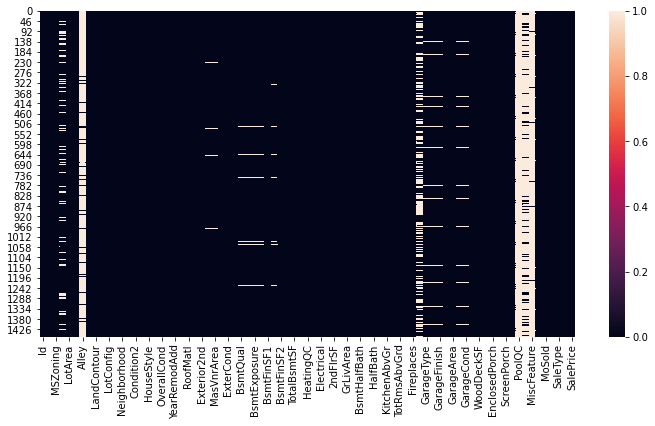

In [14]:
#plot of missing value attributes
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull())
plt.show()

In [15]:
#missing value count in each of the columns
Isnull = train .isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace = True, ascending = False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [16]:
# Vizualizing missing values
#convert to a dataframe
Isnull = Isnull.to_frame()

In [17]:
Isnull.columns = ['count'] # creating a column naming count that contains the % of missing values variables wise

In [18]:
Isnull.index.names = ['Name'] # creating a column that caontains the name of the variable

In [19]:
Isnull['Name'] = Isnull.index #using index values i.e. the features names and storing in new columns 'Name' we just created

In [20]:
Isnull

,count,Name
Name,,
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu
LotFrontage,17.739726,LotFrontage
GarageType,5.547945,GarageType
GarageYrBlt,5.547945,GarageYrBlt
GarageFinish,5.547945,GarageFinish


<function matplotlib.pyplot.show(close=None, block=None)>

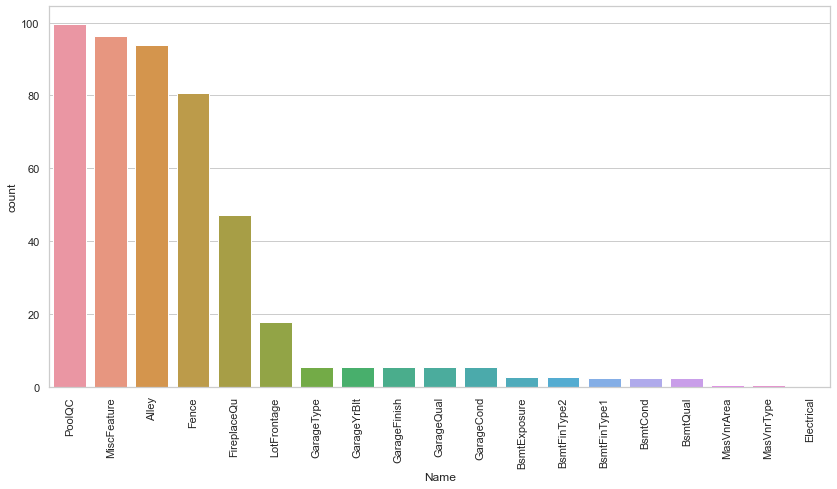

In [21]:
# plot missing values 
plt.figure(figsize=(14,7))
sns.set(style = 'whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation=90)
plt.show

In [22]:
# Correlation between train attributes
#seperate data which has only numeric values
train_corr = train.select_dtypes(include =[np.number])

In [23]:
train_corr.shape

(1460, 38)

In [24]:
#delete id because there is no need for correlation plot
del train_corr['Id']

<AxesSubplot:>

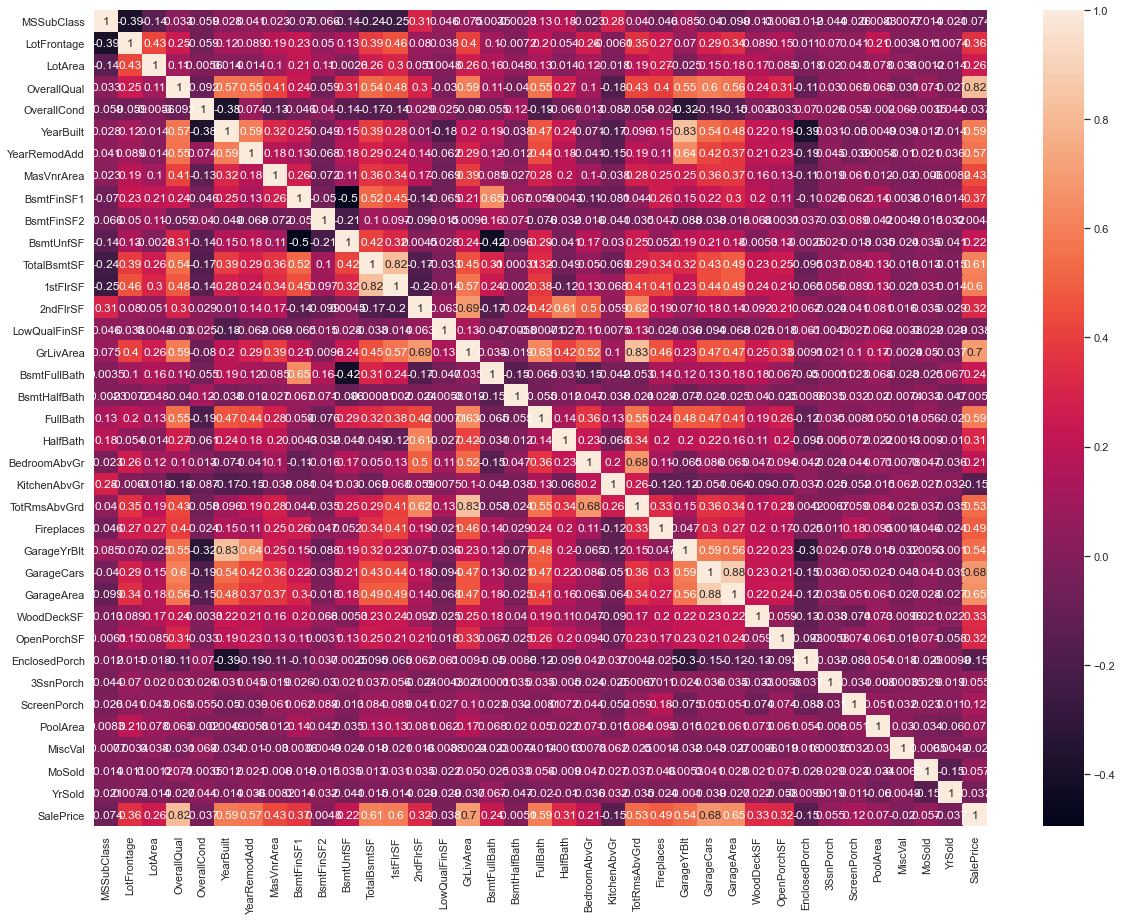

In [25]:
#correlation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

Top 50% correlation train attributes with target variable

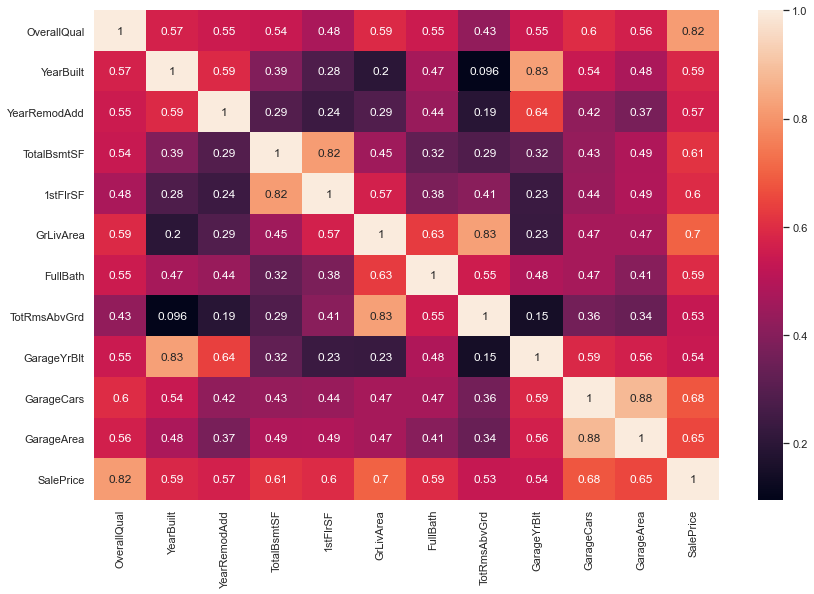

In [26]:
top_feature = corr.index[abs(corr['SalePrice'])>0.5]
plt.subplots(figsize=[14,9])
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot= True)
plt.show()

In [27]:
# Overallqual is higjly correlated with Sale Price and has a correlation coeff of 0.82
# unique values of overallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

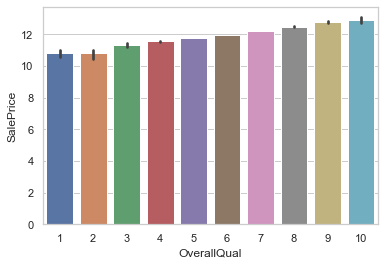

In [28]:
sns.barplot(train.OverallQual, train.SalePrice)

In [29]:
train.SalePrice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

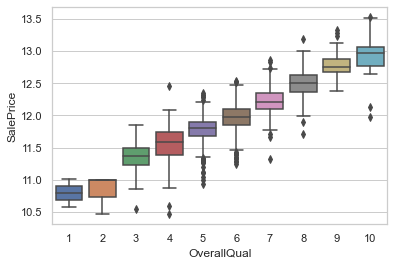

In [30]:
sns.boxplot(x="OverallQual", y="SalePrice", data=train)

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


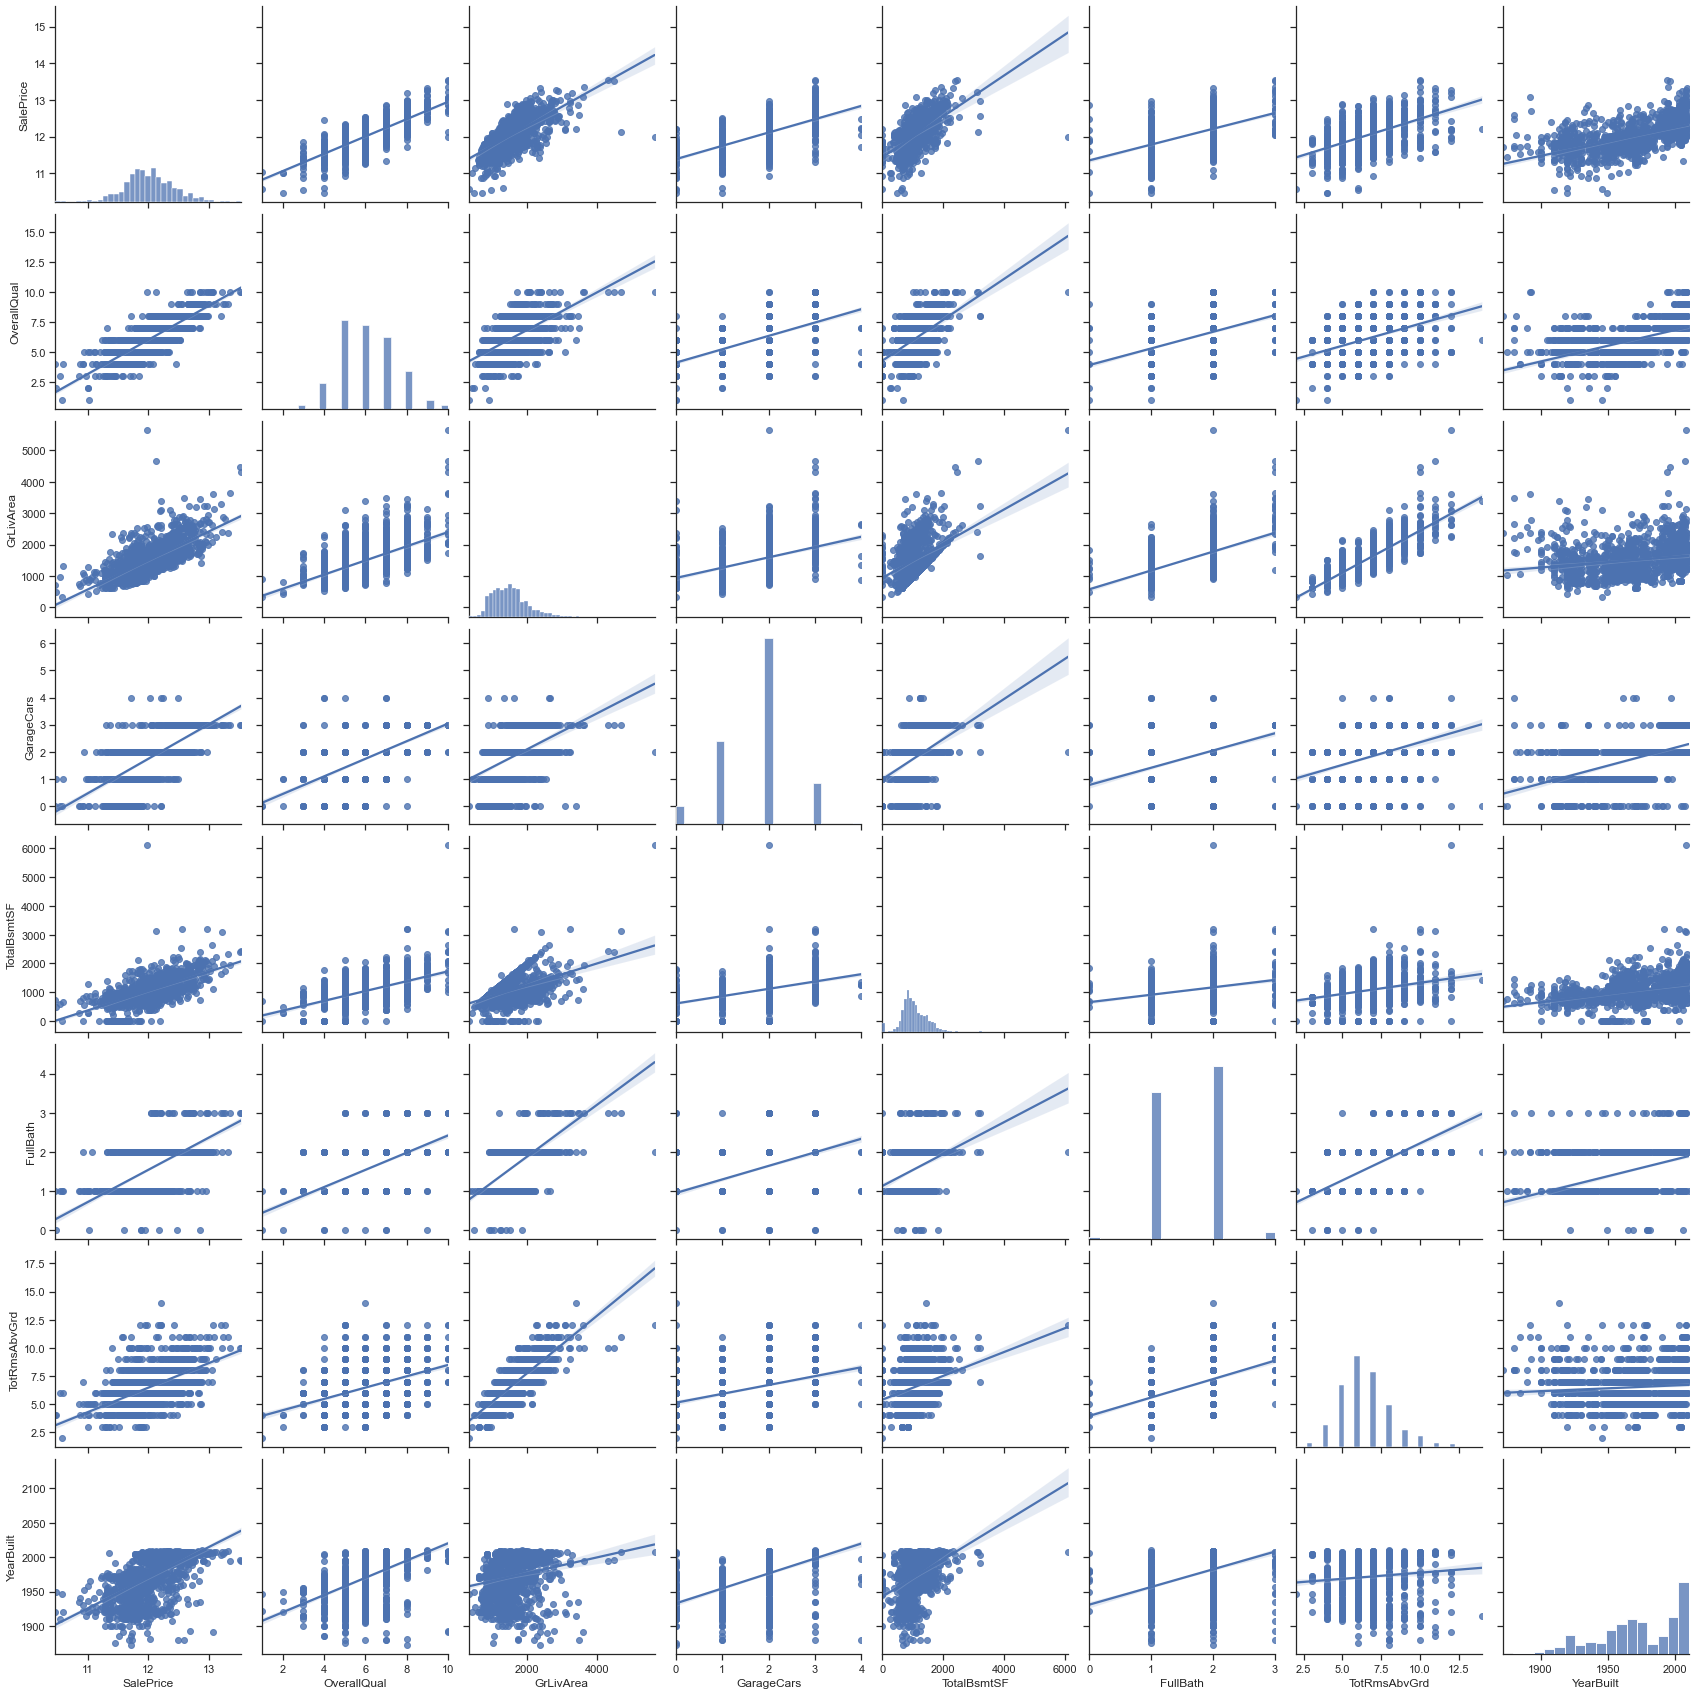

In [31]:
col = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [32]:
train[col].SalePrice.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [33]:
train[col].shape

(1460, 8)

In [34]:
print('Find the most important featured relative to the target')
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find the most important featured relative to the target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [35]:
#Imputing missing values
#PoolQC has missing value ratio of 99%+, so there we fill 'None'.
train['Po0lQC'] = train ['PoolQC'].fillna('None')

In [36]:
train.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [37]:
#for features having 50% missing values again fill with 'None'

In [38]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')

In [39]:
train.MiscFeature.value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [40]:
train['Alley']= train['Alley'].fillna('None')

In [41]:
train['Fence'] = train['Fence'].fillna('None')

In [42]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [43]:
# Groupby neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [44]:
 train.groupby('Neighborhood')['LotFrontage'].fillna(train.groupby('Neighborhood')['LotFrontage'].median())

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [45]:
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [46]:
train.LotFrontage.describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [47]:
#Garagetype, Garagefinish, Garagequal and Garagecond will replace them with None
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    train[col]= train[col].fillna('None')

In [48]:
#GarageYrblt, Garagearea and garagecards replaced with 0
for col in ['GarageYrBlt', 'GarageArea','GarageCars']:
    train[col] = train[col].fillna(int(0))

In [49]:
for col in ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']:
    train[col] = train[col].fillna('None')

In [50]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [51]:
train['MasVnrArea'] = train['MasVnrArea'].fillna('None')

In [52]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [53]:
#remove utilities
train = train.drop(['Utilities'], axis =1)

<AxesSubplot:>

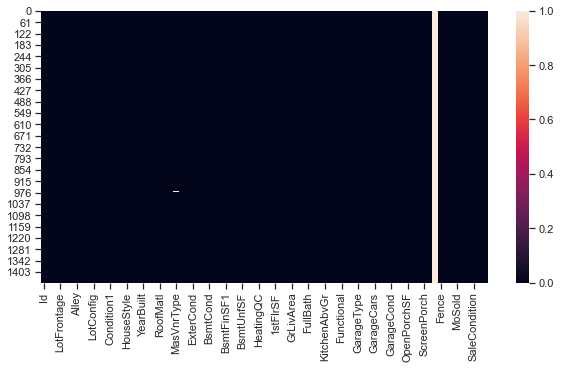

In [54]:
#check if there is any null value or not
plt.figure(figsize = (10,5))
sns.heatmap(train.isnull())

In [55]:
train_cat = train.select_dtypes(include = 'object').columns #seperating categorical variables

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
#Label encoding categorical variables
for c in train_cat:
    lbl = LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))

In [58]:
#Preparing data for prediction
y = train['SalePrice']

In [59]:
#delete SalePrice
del train['SalePrice']

In [60]:
# Take the values as X and Y
X = train.values
y = y.values

In [61]:
#split data into train and test format
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=7)

In [62]:
#perform linear regression
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train, y_train)

LinearRegression()

In [65]:
#prediction for single data point
print('Predict Value', (model.predict([X_test[142]])))
print('Actual Value',([y_test[142]]))

Predict Value [11.62842441]
Actual Value [11.767187766223199]


In [66]:
#Score/Accuracy
print('Accuracy', model.score(X_test, y_test)*100)

Accuracy 89.22148759620926


In [67]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [69]:
from math import sqrt
rmse = sqrt(mse)

In [70]:
print('Mean_Squared_Error:', mse)
print('Root_Mean_Squared_Error', rmse)
print('r_square_value:', r_squared)

Mean_Squared_Error: 0.01806165935731579
Root_Mean_Squared_Error 0.13439367305537783
r_square_value: 0.8922148759620926


C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


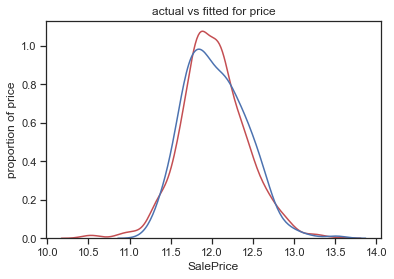

In [71]:
#distribution plot to comapre actual vs prediacted values for price
ax1 = sns.distplot(y_train,hist= False, color = 'r', label='actual values')
sns.distplot(y_pred,hist = False, color='b', label='fitted values', ax=ax1)
plt.title('actual vs fitted for price')
plt.xlabel('SalePrice')
plt.ylabel('proportion of price')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

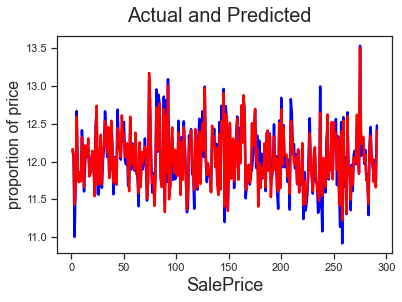

In [73]:
c = [i for i in range(1,292)]
fig = plt.figure()
plt.plot(c,y_test[1:292],color = 'blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred[1:292],color = 'red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize =20)
plt.xlabel("SalePrice", fontsize=18)
plt.ylabel('proportion of price', fontsize=16)
plt.show

Text(0, 0.5, 'Actual - Predicted')

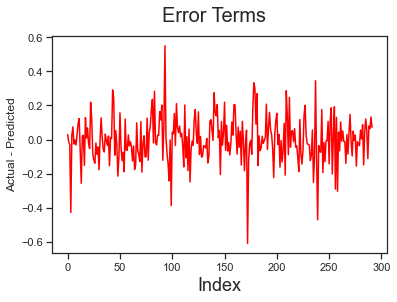

In [72]:
# Error terms
c=[ i for i in range(0,292)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color='red',linestyle='-')
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Actual - Predicted')